In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## METADATA
- **client_id**: Every client’s unique ID.
- **variation**: Indicates if a client was part of the experiment.
- **visitor_id**: A unique ID for each client-device combination.
- **visit_id**: A unique ID for each web visit/session.
- **process_step**: Marks each step in the digital process.
- **date_time**: Timestamp of each web activity.
- **clnt_tenure_yr**: Represents how long the client has been with Vanguard, measured in years.
- **clnt_tenure_mnth**: Further breaks down the client’s tenure with Vanguard in months.
- **clnt_age**: Indicates the age of the client.
- **gendr**: Specifies the client’s gender.
- **num_accts**: Denotes the number of accounts the client holds with Vanguard.
- **bal**: Gives the total balance spread across all accounts for a particular client.
- **calls_6_mnth**: Records the number of times the client reached out over a call in the past six months.
- **logons_6_mnth**: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [44]:
final_demo = pd.read_csv('df_final_demo.txt', sep=',')

display(final_demo.shape)
display(final_demo.head())
final_demo.isna().sum()

(70609, 9)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [45]:
# Removing NaN rows

final_demo2 = final_demo[final_demo.isnull().sum(axis=1) < 2]

final_demo2.head(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [46]:
# Gender fix

final_demo2["gendr"] = final_demo2["gendr"].replace({"X":"U"})
final_demo2["gendr"].unique()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8568\2762273809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_demo2["gendr"] = final_demo2["gendr"].replace({"X":"U"})


array(['U', 'M', 'F'], dtype=object)

In [47]:
# Rename the columns
final_demo2 = final_demo2.rename(columns={"clnt_tenure_yr":"tenure_year", "clnt_tenure_mnth":"tenure_month", "clnt_age":"age", "gendr":"gender","num_accts":"number_accounts", "calls_6_mnth":"calls_6_months","logons_6_mnth":"logons_6_months"})

In [48]:
def age_group(row):
    if row < 18:
        return "teenager"
    elif row <35:
        return "young_adult"
    elif row <50:
        return "adult"
    elif row <65:
        return "old_adult"
    else:
        return "Elder"
     

final_demo2["age_group"] = final_demo2["age"].apply(age_group)

final_demo2

,client_id,tenure_year,tenure_month,age,gender,number_accounts,bal,calls_6_months,logons_6_months,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,old_adult
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,old_adult
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,young_adult
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,adult
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,young_adult
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,adult
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,young_adult
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,old_adult
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Elder


#### first visualizations

In [49]:
final_demo3 = final_demo2.copy()

<Axes: xlabel='gender', ylabel='count'>

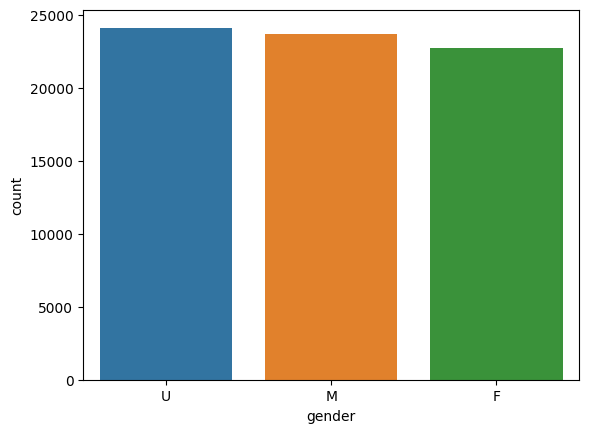

In [50]:
# Count occurrences of each gender
gender_counts = final_demo3['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']  # Rename columns

# Create a bar plot using the aggregated counts
sns.barplot(data=gender_counts, x='gender', y='count', hue='gender')


In [51]:
# Group by 'age_group' and sum 'logons_6_months'
l1 = final_demo3.groupby(["age_group"])["logons_6_months"].sum().reset_index()

def order_group(row):
    if row == "teenager":
        return 0
    elif row == "young_adult":
        return 3
    elif row == "adult":
        return 6
    elif row == "old_adult":
        return 9
    elif row == "Elder":
        return 12
    else:
        return "error"

l1["order"]=l1["age_group"].map(order_group)
l1 = l1.sort_values(by="order")
l1 = l1.set_index("order")

l1


,age_group,logons_6_months
order,,
0,teenager,1418.0
3,young_adult,111336.0
6,adult,97146.0
9,old_adult,126288.0
12,Elder,56796.0


<Axes: xlabel='age_group', ylabel='logons_6_months'>

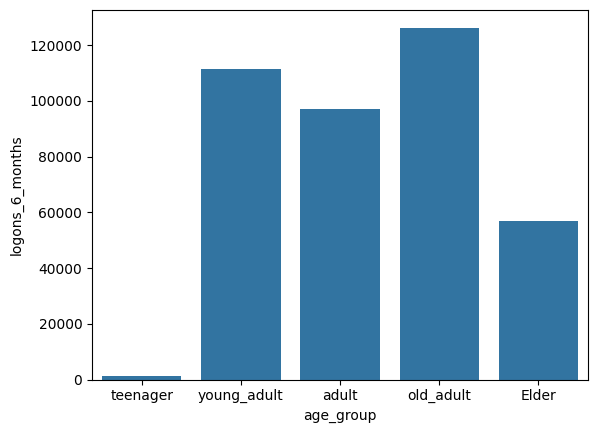

In [52]:
# Create a bar plot using the aggregated counts
sns.barplot(data=l1, x='age_group', y='logons_6_months')

In [53]:
# Group by 'age_group' and sum 'logons_6_months'
l2 = final_demo3.groupby(["age_group", "gender"])["logons_6_months"].sum().reset_index()
l2

,age_group,gender,logons_6_months
0,Elder,F,21332.0
1,Elder,M,23707.0
2,Elder,U,11757.0
3,adult,F,31233.0
4,adult,M,36807.0
5,adult,U,29106.0
6,old_adult,F,44629.0
7,old_adult,M,47676.0
8,old_adult,U,33983.0
9,teenager,F,224.0


In [54]:
def order_gender(row):
    if row == "U":
        return 0
    elif row == "M":
        return 1
    elif row == "F":
        return 2
    else:
        return "error"
    
l2["order"]=l2["age_group"].map(order_group)
l2["order"]=l2["order"]+l2["gender"].map(order_gender)
l2 = l2.sort_values(by="order")
l2 = l2.set_index("order")

l2

,age_group,gender,logons_6_months
order,,,
0,teenager,U,906.0
1,teenager,M,288.0
2,teenager,F,224.0
3,young_adult,U,57340.0
4,young_adult,M,31153.0
5,young_adult,F,22843.0
6,adult,U,29106.0
7,adult,M,36807.0
8,adult,F,31233.0


<Axes: xlabel='age_group', ylabel='logons_6_months'>

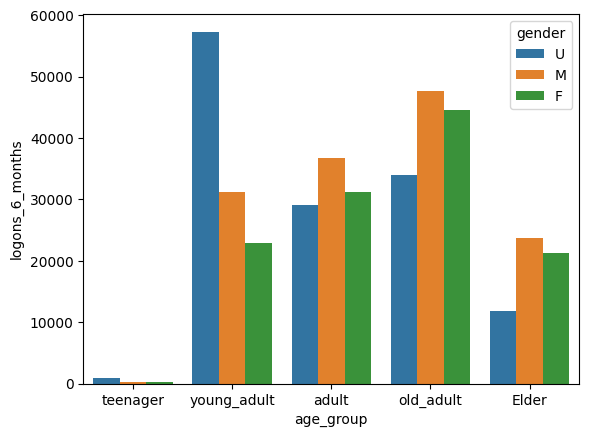

In [55]:
# Create a bar plot
sns.barplot(data=l2, x='age_group', y='logons_6_months', hue='gender')

,age_group,gender,tenure_month
order,,,
0,teenager,U,68.216667
1,teenager,M,195.144737
2,teenager,F,196.396552
3,young_adult,U,78.711949
4,young_adult,M,156.444218
5,young_adult,F,157.615928
6,adult,U,90.445145
7,adult,M,176.474556
8,adult,F,174.678203


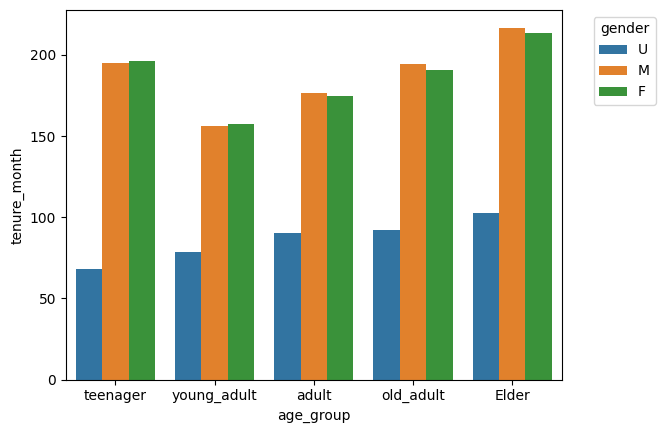

In [73]:
# Group by 'age_group' and sum 'logons_6_months'
l3 = final_demo3.groupby(["age_group", "gender"])["tenure_month"].mean().reset_index()

l3["order"]=l3["age_group"].map(order_group)
l3["order"]=l3["order"]+l3["gender"].map(order_gender)
l3 = l3.sort_values(by="order")
l3 = l3.set_index("order")

# Create a bar plot
sns.barplot(data=l3, x='age_group', y='tenure_month', hue='gender')

# Move the legend outside the plot
plt.legend(title='gender', bbox_to_anchor=(1.05, 1), loc='upper left')

l3

 ### 1. Who are the primary clients using this online process?

From these barplots we can clearly see that the primary client (the one with most usage) is the old adult category (ages between 50-65).
Gender wise, Unspecified lead the race, with Males following close behind.
Once all data is being grouped, we see that young adults (age 18-35) with unspecified gender have the highest usage, followed by both male and female old adults.

###  2. Are the primary clients younger or older, new or long-standing?

Regarding tenure, we clearly see Elder (age > 65) has the higher numbers, with an average of over 200 months for both Male and Female genders, followed by teenagers (age < 18) and old adults with around 195 months on average.


## SECOND DATASET

In [ ]:
final_exp = pd.read_csv('df_final_experiment_clients.txt', sep=',')

display(final_exp.shape)
display(final_exp.head())
final_exp.isna().sum()



In [ ]:
data1 = pd.read_csv('df_final_web_data_pt_1.txt', sep=',')

display(data1.shape)
display(data1.head())
data1.isna().sum()

data1["process_step"].unique()

In [ ]:
data2 = pd.read_csv('df_final_web_data_pt_2.txt', sep=',')

display(data2.shape)
display(data2.head())
data2.isna().sum()
data2["process_step"].unique()

# Day1/2:
- Carried out data cleaning and fix any problems if there are any.
- Answered the following questions about demographics:
    1. Who are the primary clients using this online process?
    2. Are the primary clients younger or older, new or long-standing?
- Carried out a client behaviour analysis to answer any additional relevant questions you think are important.